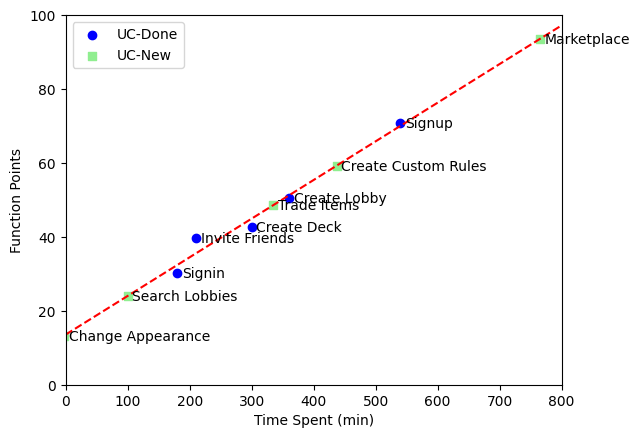

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Daten definieren 0=name 1=time 2=points
old_use_cases = np.array([('Create Deck', 300, 42.8), ('Signin', 180, 30.2), ('Invite Friends', 210, 39.8), ('Signup', 540, 70.7), ('Create Lobby', 360, 50.6)])

time_in_min = np.array([float(t[1]) for t in old_use_cases])
function_points = np.array([float(t[2]) for t in old_use_cases])
old_uc_names = np.array([str(t[0]) for t in old_use_cases])

# Ausgleichsgerade berechnen
m, b = np.polyfit(time_in_min, function_points, 1)
regression_line = m * time_in_min + b

# Neue Use Cases
new_use_cases = np.array([('Marketplace', 93.5), ('Trade Items', 48.6), ('Search Lobbies', 24), ('Create Custom Rules', 59.3), ('Change Appearance', 13.3)])

new_uc_names = np.array([str(t[0]) for t in new_use_cases])

y = np.array([float(t[1]) for t in new_use_cases])
x = (y - b) / m

# Punkte berechnen zur besseren Darstellung der Ausgleichsgerade
x1 = np.linspace(0, 800, 100)
y1 = m*x1 + b

# Ausgleichsgerade und Neue Punkte in einem Diagramm plotten
fig, ax = plt.subplots()
ax.plot(x1, y1, linestyle= 'dashed', color= 'red')
ax.scatter (time_in_min, function_points, color='blue', label= 'UC-Done')
ax.scatter(x, y, color= 'lightgreen', marker='s', label='UC-New')
plt.xlabel('Time Spent (min)')
plt.ylabel('Function Points')

names = [*old_uc_names, *new_uc_names]
xl = [*time_in_min, *x]
yl = [*function_points, *y]
for i, txt in enumerate(names):
    ax.annotate(txt, (xl[i]+7.5, yl[i]-1.25))

# Bereich festlegen, welcher angezeigt werden soll
ax.set_xlim([0, 800])
ax.set_ylim([0, 100])
ax.legend()
plt.show
plt.savefig('function_point_analysis.png', bbox_inches='tight')